# Hands-on 04: Operações importantes com sinais 

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre processos estocásticos e medidas relacionadas
- Fazer uma breve revisão sobre cálculo de potência e energia de um sinal (seu significado e seu cálculo)
- Fazer uma aplicação prática com a autocorrelção (remoção de eco com a autocorrelação).

# Prática 1: Cálculo da autocorrelação


Para calcular a autocorrelação de um sinal amostrado não será necessário integrações, pois no tempo discreto sua formulação depende de um somatório. Portanto usaremos a fórmula de autocorrelação discreta para calcular $R_{xx}(m)$. 


**Passo 01:** Abra um script no Spyder, salve-o como **handson4_1_1.py** e escreva o seguinte código:

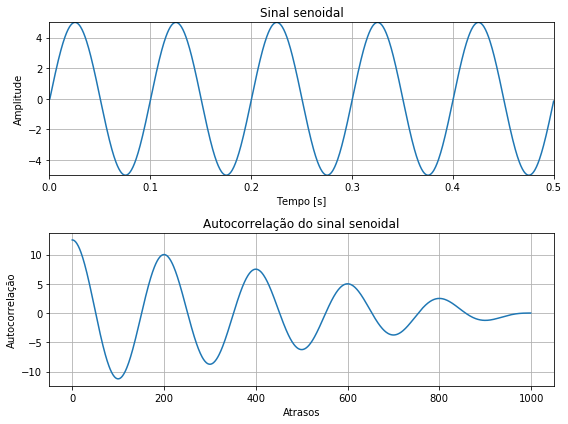

In [8]:
import numpy as np
from matplotlib import pyplot as plt
M =1000                                # Número de atrasos
N =1000                                # Número de amostras
f1=10                                  # Frequência do seno (kHz)
Fs=2000                                # Frequência de amostragem (kHz)
n =np.arange(0,N)                      # Vetor com índices de amostra
Am=5                                   # Determina a amplitude
x=Am*np.sin(2*np.pi*f1*n/Fs)           # Gera o sinal x(n)
t=np.arange(1,N+1)*(1/Fs)              # Definiçao do eixo do tempo
#implementaçao:
def xcorr(sinal):
    N = len(sinal)
    rxx = np.zeros([N],dtype = float)
    for m in range(N):
        for n in range(N-m):
            rxx[m] = rxx[m]+x[n]*x[n+m]
    rxx = rxx/N
    return rxx
Rxx = xcorr(x)
#Plotagem:
plt.figure(1,[8,6])
#Plota x[n]
plt.subplot(211)
plt.title("Sinal senoidal")
plt.ylabel("Amplitude")
plt.xlabel("Tempo [s]")
plt.grid()
plt.axis([0,0.5,-5,5])
plt.plot(t,x)
#Plota Autocorrelação
plt.subplot(212)
plt.plot(Rxx)
plt.xlabel("Atrasos")
plt.ylabel("Autocorrelação")
plt.title("Autocorrelação do sinal senoidal")
plt.grid()

plt.tight_layout()
plt.show()

**Passo 2:** Sabemos que a potência média é o valor de $R_{xx}(0)$. Assim, vamos inspecionar o gráfico de autocorrelação e verifique a potência média do sinal. Digite no _Console IPython_ o seguinte comando:

In [9]:
Rxx[0]

12.499999999999996

Note que sse valor é exatamente $\frac{Am^2}{2} = \frac{5^2}{2} =$ 12,5.

# Prática 2: Função do Python para o cálculo da autocorrelação

A função obtida na prática 1 mostra a autocorrelação do sinal $x(t)$ para valores de $m$ positivos. No Python, a função **numpy.correlate($\cdot$)** produz uma estimativa da correlação entre duas sequências aleatórias ou a própria autocorrelação. Note que a numpy.correlate() encontra a autocorrelação quando as duas sequências passadas como parâmetros são as mesmas, como será mostrado em seguida. 

**Passo 01:** Abra um script no Matlab, salve-o como **handson4_2_1.py** e escreva o seguinte código:

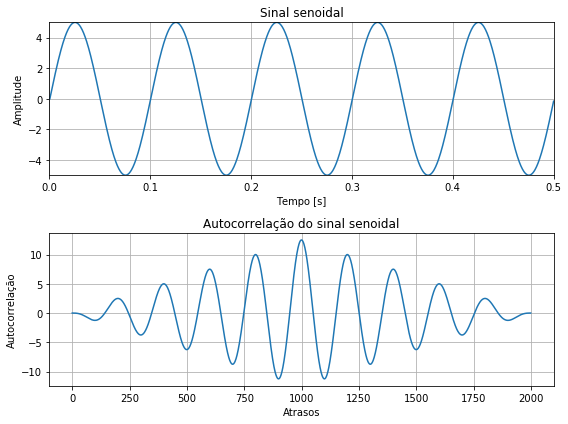

In [8]:
import numpy as np
from matplotlib import pyplot as plt
M =1000                                # Número de atrasos
N =1000                                # Número de amostras
f1=10                                  # Frequência do seno (kHz)
Fs=2000                                # Frequência de amostragem (kHz)
n =np.arange(0,N)                      # Vetor com índices de amostra
Am=5                                   # Determina a amplitude
x=Am*np.sin(2*np.pi*f1*n/Fs)           # Gera o sinal x(n)
t=np.arange(1,N+1)*(1/Fs)              # Definiçao do eixo do tempo

Rxx = np.correlate(x,x,'full')/len(x)
#Plotagem:
plt.figure(1,[8,6])
#Plota x[n]
plt.subplot(211)
plt.title("Sinal senoidal")
plt.ylabel("Amplitude")
plt.xlabel("Tempo [s]")
plt.grid()
plt.axis([0,0.5,-5,5])
plt.plot(t,x)
#Plota Autocorrelação
plt.subplot(212)
plt.plot(Rxx)
plt.xlabel("Atrasos")
plt.ylabel("Autocorrelação")
plt.title("Autocorrelação do sinal senoidal")
plt.grid()

plt.tight_layout()
plt.show()

Note que a função aucorrelação obtida na prática 2 mostra a autocorrelação do sinal $x(t)$  centrada no zero. Assim, a função **np.correlate** retorna o dobro do número de amostras do sinal $x(n)$. Como esperado, o gráfico acima estima a autocorrelação com $N$=1000 amostras, dessa forma se assemelhando ao gráfico do código feito usando a função implementada (prática 1).

# Prática 3: Cálculo de potência média

Visto que o Python não possui, na NumPy ou na SciPy, uma função equivalente a **bandpower()** do Matlab, resta implementar o cálculo de potência de outras maneiras:
- **No tempo:** $P = \frac{1}{N}\sum\limits_{n=0}^{N-1} \left |  x[n]  \right |^{2} $

- **Na frequência:** $P = \sum\limits_{n=0}^{N-1} \left |X[k]\right |^{2} $

- **Pela autocorrelação**: $P = R_{xx}(0)$, em que $R_{xx}(0)$ é a função autocorrelação.

- **Pela variância**: $P = E[x^2] = {\mu_x}^2 + {\sigma_x}^2 $. Um sinal senoidal tem média zero, pois possui ciclos positivos e negativos simétricos. Então, a variância corresponde exatamente à potência do sinal.

**Passo 01**: Abra um script no Spyder, salve-o como **handson4_3_1.py** e escreva o seguinte código:

In [10]:
import numpy as np
import time
## Parâmetros do sinal 
fc=0.04                              # Frequência do seno
Fs=1                                 # Frequência de amostragem
Ts = 1/Fs                            # Tempo entre amostras
A = 10                               # Amplitude do sinal
nC = 2000                            # Número de períodos da onda   
t=np.arange(0,nC/fc,Ts)              # Vetor tempo
x=A*np.cos(2*np.pi*fc*t)             # Gera o sinal x(n)
N = len(x)                           # Número de amostras do sinal
sT1 = time.clock() 
Px_tempo =(np.linalg.norm(x)**2)/N   # Cálculo da potência no tempo
print('Potência via amostras no tempo = ',Px_tempo,time.clock()-sT1,' segundos para calcular.')

sT2 =time.clock()
Nfft = 1000                          # Número de pontos da FFT
Xfft=np.fft.fft(x,Nfft)              # Encontra a FFT
Xfft = Xfft/Nfft                     # Encontra a FFT 
Px_fft = np.sum(Xfft*np.conj(Xfft))  # Cálculo da potência na frêquencia
print('Potência via FFT (Parseval) = ',abs(Px_fft),time.clock()-sT2,' segundos para calcular.' )

sT3 =time.clock()
Rxx=np.correlate(x,x,'full')/len(x)  # Estima a autocorrelaçao de x(n)
Px_Rxx = Rxx[N-1]                    # Cálculo da potência duas bandas via autocorrelação
print('Potência via autocorrelação = ',Px_Rxx,time.clock()-sT3, ' segundos para calcular.' )

sT4 =time.clock()
Pvar = np.var(x)                     # Cálculo da potência duas bandas via variancia
print('Potência via variância = ',Pvar,time.clock()-sT4,' segundos para calcular.' )

Potência via amostras no tempo =  50.0 0.0026950000000169894  segundos para calcular.
Potência via FFT (Parseval) =  50.0 0.0015930000000139444  segundos para calcular.
Potência via autocorrelação =  50.0 1.062526000000048  segundos para calcular.
Potência via variância =  50.0 0.000734000000022661  segundos para calcular.


Observe as várias maneiras de estimar a potência resultaram em valores similares. Percebe-se que há um pequeno erro na potência calculada pela variância devido ao número de amostras da senoide. Quanto maior o número de amostras $N$, mais preciso é o cálculo da potência, pois mais próximo de zero será a média.

**Passo 2:** Mude a variável **_nC_** para 20000 e veja o que acontece com a imprecisão do cálculo da potência e com o tempo para calcular. 